In [1]:
import sys
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 현재 노트북 파일의 경로를 기준으로 프로젝트 루트 경로를 계산
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))

# sys.path에 프로젝트 루트 경로가 없으면 추가
if project_root not in sys.path:
  sys.path.append(project_root)


In [2]:
from src.data.db_handler import DBHandler

data_store = DBHandler(db_name="data_store")

origin_df = data_store.fetch_data(table_name="kr_stock_data")

In [3]:
df = origin_df.copy()

In [4]:
df

,ticker,stck_bsop_date,prdy_vrss_x,prdy_vrss_sign_x,acml_vol_x,acml_tr_pbmn_x,stck_oprc_x,stck_hgpr_x,stck_lwpr_x,stck_clpr,flng_cls_code,sale_account,sale_cost,sale_totl_prfi,bsop_prti,op_prfi,thtr_ntin,cras,fxas,total_aset,flow_lblt,fix_lblt,total_lblt,total_cptl,grs,bsop_prfi_inrt,ntin_inrt,roe_val,eps_x,sps,bps_x,rsrv_rate,lblt_rate,bram_depn,crnt_rate,quck_rate,equt_inrt,totl_aset_inrt,cptl_ntin_rate,sale_ntin_rate,sale_totl_rate,payout_rate,ebitda,lstg_stqt,cpta,papr,scts_mket_lstg_dt,sbst_pric,thdt_clpr,bfdy_clpr,std_idst_clsf_cd_name,iscd_stat_cls_code,marg_rate,new_hgpr_lwpr_cls_code,prdy_vrss_y,prdy_ctrt,acml_tr_pbmn_y,acml_vol_y,prdy_vrss_vol_rate,stck_oprc_y,stck_hgpr_y,stck_lwpr_y,stck_mxpr,stck_llam,stck_sdpr,wghn_avrg_stck_prc,hts_frgn_ehrt,frgn_ntby_qty,pgtr_ntby_qty,pvt_scnd_dmrs_prc,pvt_frst_dmrs_prc,pvt_pont_val,pvt_frst_dmsp_prc,pvt_scnd_dmsp_prc,dmrs_val,dmsp_val,stck_sspr,aspr_unit,hts_avls,per,pbr,vol_tnrt,eps_y,bps_y,d250_hgpr,d250_hgpr_date,d250_hgpr_vrss_prpr_rate,d250_lwpr,d250_lwpr_date,d250_lwpr_vrss_prpr_rate,stck_dryy_hgpr,dryy_hgpr_vrss_prpr_rate,dryy_hgpr_date,stck_dryy_lwpr,dryy_lwpr_vrss_prpr_rate,dryy_lwpr_date,w52_hgpr,w52_hgpr_vrss_prpr_ctrt,w52_hgpr_date,w52_lwpr,w52_lwpr_vrss_prpr_ctrt,w52_lwpr_date,whol_loan_rmnd_rate,frgn_hldn_qty,last_ssts_cntg_qty,aspr_acpt_hour,askp1,askp10,bidp1,bidp10,askp_rsqn1,askp_rsqn2,askp_rsqn3,askp_rsqn4,askp_rsqn5,askp_rsqn6,askp_rsqn7,askp_rsqn8,askp_rsqn9,askp_rsqn10,bidp_rsqn1,bidp_rsqn2,bidp_rsqn3,bidp_rsqn4,bidp_rsqn5,bidp_rsqn6,bidp_rsqn7,bidp_rsqn8,bidp_rsqn9,bidp_rsqn10,total_askp_rsqn,total_bidp_rsqn,ntby_aspr_rsqn,new_mkop_cls_code,prdy_clpr_vrss_oprc_rate,lwpr_vrss_prpr,lwpr_vrss_prpr_sign,prdy_clpr_vrss_lwpr_rate,hgpr_vrss_prpr,hgpr_vrss_prpr_sign,prdy_clpr_vrss_hgpr_rate,oprc_vrss_prpr,oprc_vrss_prpr_sign,prdy_vol
0,000080,1985-01-25,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,1.07,5313280,48024,160000,19170,19260,19160,19070,2593,1470,254,181,25,135,3,1174,23,46,298,5086,1207,5708,5010,7074,5596,2932,5652,1119,5904,39682,33778,31,-0.05,50.0,2,-0.36,-20.0,5,0.00,-10.0,5,191693
1,000080,1985-01-26,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,22200,-13.69,2025-07-07,18680,2.57,2025-02-04,1.07,5313280,48024,160000,19170,19260,19160,19070,2593,1470,254,181,25,135,3,1174,23,46,298,5086,1207,5708,5010,7074,5596,2932,5652,1119,5904,39682,33778,31,-0.05,50.0,2,-0.36,-20.0,5,0.00,-10.0,5,191693
2,000080,1985-01-28,0.0,3,0.0,0.000000e+00,6403.0,6403.0,6403.0,6403.0,00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,70133611,363168055000,5000,2009-10-19,15320,19160,19160,알콜음료 제조업,55,40.0,NaN,-20.0,-0.10,3151539425,164607,85.87,19170,19180,19110,24900,13430,19180,19144.18,7.58,-17687.0,-23952,19413,19296,19223,19106,19033,19260,19070,15340,10,13438,14.25,1.13,0.23,1345.0,16889,22200,2025-07-07,-13.69,18680,2025-02-04,2.57,22200,-13.69,202

In [5]:
import pandas as pd
import numpy as np

# 1. 수치형 컬럼 선택
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# 2. 범주형 컬럼 선택
categorical_cols = df.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()
# 3. Datetime 컬럼 선택
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# --- 결과 확인 ---
print(f"총 {len(df.columns)}개의 컬럼이 3개의 그룹으로 분리되었습니다.")
print("-" * 50)
print(f"수치형 컬럼 ({len(numeric_cols)}개)")
print(f"범주형 컬럼 ({len(categorical_cols)}개)")
print(f"Datetime 컬럼 ({len(datetime_cols)}개)")
print("-" * 50)

# 최종 검증
total_classified = len(numeric_cols) + len(categorical_cols) + len(datetime_cols)
print(f"검증: {total_classified} (분류된 컬럼) == {len(df.columns)} (전체 컬럼)")

총 144개의 컬럼이 3개의 그룹으로 분리되었습니다.
--------------------------------------------------
수치형 컬럼 (126개)
범주형 컬럼 (10개)
Datetime 컬럼 (8개)
--------------------------------------------------
검증: 144 (분류된 컬럼) == 144 (전체 컬럼)


In [6]:
def log_transform(df: pd.DataFrame, columns: list) -> pd.DataFrame:
  """
  지정된 컬럼들에 대해 np.log1p (log(1+x)) 변환을 적용합니다.

  Args:
    df (pd.DataFrame): 원본 데이터프레임
    columns (list): 로그 변환을 적용할 컬럼 이름 리스트

  Returns:
    pd.DataFrame: 로그 변환이 적용된 새로운 데이터프레임
  """
  df_transformed = df.copy()
  for col in columns:
    df_transformed[col] = np.log1p(df_transformed[col])
  print(f"로그 변환이 적용된 컬럼 수: {len(columns)}")
  return df_transformed

df_log_transformed = log_transform(df, numeric_cols)

로그 변환이 적용된 컬럼 수: 126


In [7]:
def check_winsorizing_necessity(df: pd.DataFrame, columns: list, threshold: float = 3.0) -> dict:
  """
  지정된 컬럼들의 첨도(Kurtosis)를 계산하여 임계값을 초과하는지 확인합니다. 임계값은 기본적으로 3.0이고, 이는 전체 분포의 99.72%를 넘어서는 값입니다.

  Args:
    df (pd.DataFrame): 분석할 데이터프레임
    columns (list): 확인할 컬럼 이름 리스트
    threshold (float): 첨도 임계값. 이 값을 초과하면 이상치 처리를 권장.

  Returns:
    dict: 임계값을 초과한 컬럼과 해당 컬럼의 첨도 값을 담은 딕셔너리
  """
  kurtosis_values = df[columns].kurt()
  problematic_features = kurtosis_values[kurtosis_values > threshold]
  
  if problematic_features.empty:
    print("첨도 임계값을 초과하는 피처가 없습니다. 윈저라이징이 필요하지 않을 수 있습니다.")
    return {}
  else:
    print(f"첨도 임계값({threshold}) 초과 피처 (윈저라이징 권장):")
    for idx, val in problematic_features.to_dict().items():
      print(f"- {idx}: {val:.2f}")
    return problematic_features.to_dict()
  
winsorize_cols = check_winsorizing_necessity(df_log_transformed, numeric_cols)

첨도 임계값(3.0) 초과 피처 (윈저라이징 권장):
- sale_account: 6.78
- sale_cost: 5.88
- cras: 4.39
- fxas: 4.06
- total_aset: 6.74
- flow_lblt: 3.52
- total_cptl: 8.87
- sps: 11.40
- bps_x: 13.56
- rsrv_rate: 3.15
- crnt_rate: 5.46
- quck_rate: 4.55
- frgn_ntby_qty: 6.55
- vol_tnrt: 8.44
- aspr_acpt_hour: 3.76
- prdy_clpr_vrss_hgpr_rate: 3.22


In [8]:
def apply_winsorizing(df: pd.DataFrame, columns: list, lower_limit: float = 0.01, upper_limit: float = 0.99) -> pd.DataFrame:
  """
  지정된 컬럼들에 대해 윈저라이징을 적용하여 이상치를 대체합니다.

  Args:
    df (pd.DataFrame): 원본 데이터프레임
    columns (list): 윈저라이징을 적용할 컬럼 이름 리스트
    lower_limit (float): 하위 경계 백분위수 (e.g., 0.01은 하위 1%)
    upper_limit (float): 상위 경계 백분위수 (e.g., 0.99는 상위 99%)

  Returns:
    pd.DataFrame: 윈저라이징이 적용된 새로운 데이터프레임
  """
  df_winsorized = df.copy()
  for col in columns:
    lower_quantile = df_winsorized[col].quantile(lower_limit)
    upper_quantile = df_winsorized[col].quantile(upper_limit)
    df_winsorized[col] = df_winsorized[col].clip(lower=lower_quantile, upper=upper_quantile)
  print(f"윈저라이징이 적용된 컬럼: (하위 {lower_limit*100}%, 상위 {upper_limit*100}% 기준)")
  return df_winsorized

In [9]:
if winsorize_cols:
  df_numerical = apply_winsorizing(df_log_transformed, columns=list(winsorize_cols.keys()))
else:
  df_numerical = df_log_transformed

display(df_numerical.describe())

윈저라이징이 적용된 컬럼: (하위 1.0%, 상위 99.0% 기준)


,stck_bsop_date,prdy_vrss_x,acml_vol_x,acml_tr_pbmn_x,stck_oprc_x,stck_hgpr_x,stck_lwpr_x,stck_clpr,sale_account,sale_cost,sale_totl_prfi,bsop_prti,op_prfi,thtr_ntin,cras,fxas,total_aset,flow_lblt,fix_lblt,total_lblt,total_cptl,grs,bsop_prfi_inrt,ntin_inrt,roe_val,eps_x,sps,bps_x,rsrv_rate,lblt_rate,bram_depn,crnt_rate,quck_rate,equt_inrt,totl_aset_inrt,cptl_ntin_rate,sale_ntin_rate,sale_totl_rate,payout_rate,ebitda,lstg_stqt,cpta,papr,scts_mket_lstg_dt,sbst_pric,thdt_clpr,bfdy_clpr,marg_rate,prdy_vrss_y,prdy_ctrt,acml_tr_pbmn_y,acml_vol_y,prdy_vrss_vol_rate,stck_oprc_y,stck_hgpr_y,stck_lwpr_y,stck_mxpr,stck_llam,stck_sdpr,wghn_avrg_stck_prc,hts_frgn_ehrt,frgn_ntby_qty,pgtr_ntby_qty,pvt_scnd_dmrs_prc,pvt_frst_dmrs_prc,pvt_pont_val,pvt_frst_dmsp_prc,pvt_scnd_dmsp_prc,dmrs_val,dmsp_val,stck_sspr,aspr_unit,hts_avls,per,pbr,vol_tnrt,eps_y,bps_y,d250_hgpr,d250_hgpr_date,d250_hgpr_vrss_prpr_rate,d250_lwpr,d250_lwpr_date,d250_lwpr_vrss_prpr_rate,stck_dryy_hgpr,dryy_hgpr_vrss_prpr_rate,dryy_hgpr_date,stck_dryy_lwpr,dryy_lwpr_vrss_prpr_rate,dryy_lwpr_date,w52_hgpr,w52_hgpr_vrss_prpr_ctrt,w52_hgpr_date,w52_lwpr,w52_lwpr_vrss_prpr_ctrt,w52_lwpr_date,whol_loan_rmnd_rate,frgn_hldn_qty,last_ssts_cntg_qty,aspr_acpt_hour,askp1,askp10,bidp1,bidp10,askp_rsqn1,askp_rsqn2,askp_rsqn3,askp_rsqn4,askp_rsqn5,askp_rsqn6,askp_rsqn7,askp_rsqn8,askp_rsqn9,askp_rsqn10,bidp_rsqn1,bidp_rsqn2,bidp_rsqn3,bidp_rsqn4,bidp_rsqn5,bidp_rsqn6,bidp_rsqn7,bidp_rsqn8,bidp_rsqn9,bidp_rsqn10,total_askp_rsqn,total_bidp_rsqn,ntby_aspr_rsqn,prdy_clpr_vrss_oprc_rate,lwpr_vrss_prpr,prdy_clpr_vrss_lwpr_rate,hgpr_vrss_prpr,prdy_clpr_vrss_hgpr_rate,oprc_vrss_prpr,prdy_vol
count,1208825,5.902560e+05,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208765e+06,1.208825e+06,1.180877e+06,1.094141e+06,1.058447e+06,1.062330e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208520e+06,8.826030e+05,650337.000000,646181.000000,1.075668e+06,1.054106e+06,1.208765e+06,1.208520e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,959884.000000,943397.000000,1.119025e+06,1.098693e+06,1.182455e+06,1.177082e+06,1.174873e+06,1.208825e+06,1.208825e+06,1.208825e+06,1208825,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,372453.000000,6.496010e+05,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,547262.000000,496742.000000,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.006712e+06,1.208825e+06,1.208825e+06,1.006712e+06,1.208825e+06,1.208825e+06,1208825,38566.000000,1.208825e+06,1208825,1.208825e+06,1.208825e+06,38566.000000,1208825,1.208825e+06,1.208825e+06,1208825,1.208825e+06,38566.000000,1208825,1.208825e+06,1.208825e+06,1208825,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,1.208825e+06,763830.000000,1.093347e+06,1.208825e+06,315456.000000,100533.0,1.195940e+06,434231.000000,1.208825e+06
mean,2010-01-28 02:44:26.535850496,-inf,1.170274e+01,2.102779e+01,1.023439e+01,1.025211e+01,1.021719e+01,1.023446e+01,1.031247e+01,9.552843e+00,8.724208e+00,-inf,7.638727e+00,-inf,9.502402e+00,9.868776e+00,1.147693e+01,9.164480e+00,8.533443e+00,1.065206e+01,1.061613e+01,-inf,2.908210,2.832303,-inf,-inf,1.151382e+01,1.101885e+01,8.044371e+00,4.665399e+00,2.869448e+00,4.606860e+00,4.293757e+00,1.921541,1.954047,-inf,-inf,-inf,NaN,-inf,1.794721e+01,2.549001e+01,7.499734e+00,1991-12-26 20:46:29.060781824,1.086053e+01,1.115375e+01,1.115375e+01,3.524442e+00,5.669254,-inf,2.348407e+01,1.233038e+01,4.855649e+00,1.115680e+01,1.116966e+01,

In [10]:
import pandas as pd
import numpy as np

def create_data_info_df(dataframe):
  """
  데이터프레임의 각 컬럼에 대한 종합적인 정보(타입, 결측치, 고유값)를
  담은 새로운 데이터프레임을 생성합니다.

  Args:
    dataframe (pd.DataFrame): 분석할 원본 데이터프레임

  Returns:
    pd.DataFrame: 각 컬럼의 정보가 요약된 데이터프레임
  """
  total_rows = len(dataframe)

  # 결측치 정보 계산
  missing_counts = dataframe.isnull().sum()
  missing_percent = ((missing_counts / total_rows) * 100).round(2)

  # 고유값 정보 계산
  nunique_counts = dataframe.nunique()
  nunique_percent = ((nunique_counts / total_rows) * 100).round(2)

  # 데이터 타입 정보
  dtypes = dataframe.dtypes

  # 정보 취합
  info_df = pd.DataFrame({
    'dtype': dtypes,
    'missing_count': missing_counts,
    'missing_percent': missing_percent,
    'nunique_count': nunique_counts,
    'nunique_percent': nunique_percent
  })

  # 결측치 비율이 높은 순으로 정렬
  info_df = info_df.sort_values(by='missing_percent', ascending=False)

  return info_df

# 함수 실행 및 결과 확인
info_df_categorical = create_data_info_df(df[categorical_cols])

In [11]:
info_df_categorical.sort_values(by="nunique_count")

,dtype,missing_count,missing_percent,nunique_count,nunique_percent
iscd_stat_cls_code,object,0,0.0,2,0.00
new_hgpr_lwpr_cls_code,object,0,0.0,2,0.00
new_mkop_cls_code,object,0,0.0,2,0.00
lwpr_vrss_prpr_sign,object,0,0.0,2,0.00
hgpr_vrss_prpr_sign,object,0,0.0,2,0.00
oprc_vrss_prpr_sign,object,0,0.0,3,0.00
prdy_vrss_sign_x,object,0,0.0,5,0.00
flng_cls_code,object,0,0.0,6,0.00
std_idst_clsf_cd_name,object,0,0.0,67,0.01
ticker,object,0,0.0,200,0.02


In [12]:
import pandas as pd

def binning_and_one_hot_encode(series: pd.Series, top_n: int = 15) -> pd.DataFrame:
  """
  빈도 기반 Binning 후 원-핫 인코딩을 수행합니다.

  Args:
    series (pd.Series): 처리할 범주형 데이터 시리즈
    top_n (int): 유지할 상위 카테고리의 개수

  Returns:
    pd.DataFrame: 원-핫 인코딩된 데이터프레임
  """
  # 1. 카테고리별 빈도 계산
  top_categories = series.value_counts().nlargest(top_n).index
  
  # 2. 상위 N개 외의 카테고리를 'Other'로 대체 (Binning)
  binned_series = series.where(series.isin(top_categories), 'Other')
  
  # 3. 원-핫 인코딩 수행
  encoded_df = pd.get_dummies(binned_series, prefix=series.name)
  
  print(f"'{series.name}' 피처를 상위 {top_n}개와 'Other'로 그룹화하여 원-핫 인코딩을 수행했습니다.")
  print(f"생성된 컬럼 개수: {encoded_df.shape[1]}")
  
  return encoded_df

In [13]:
# 상위 4개만 남기고 Binning + OHE 수행
encoded_features = binning_and_one_hot_encode(df['std_idst_clsf_cd_name'], top_n=10)
encoded_features

'std_idst_clsf_cd_name' 피처를 상위 10개와 'Other'로 그룹화하여 원-핫 인코딩을 수행했습니다.
생성된 컬럼 개수: 11


,std_idst_clsf_cd_name_1차 철강 제조업,std_idst_clsf_cd_name_Other,std_idst_clsf_cd_name_금융지원 서비스업,std_idst_clsf_cd_name_기초화학물질 제조업,std_idst_clsf_cd_name_기타 금융업,std_idst_clsf_cd_name_기타 화학제품 제조업,std_idst_clsf_cd_name_동물용 사료 및 조제식품 제조업,std_idst_clsf_cd_name_보험업,std_idst_clsf_cd_name_의약품 제조업,std_idst_clsf_cd_name_일차전지 및 축전지 제조업,std_idst_clsf_cd_name_자동차용 엔진 및 자동차 제조업
0,False,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1208820,False,True,False,False,False,False,False,False,False,False,False
1208821,False,True,False,False,False,False,False,False,False,False,False
1208822,False,True,False,False,False,False,False,False,False,False,False
1208823,False,True,False,False,False,False,False,False,False,False,False


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

class AutoencoderTuner:
  """
  Autoencoder 하이퍼파라미터 튜닝 프로세스를 캡슐화하는 클래스.
  SRP 원칙에 따라 '최적의 Autoencoder를 찾는 것'이라는 단일 책임을 가진다.
  """
  def __init__(self, series: pd.Series):
    """
    클래스 초기화 시 데이터 전처리를 수행.

    Args:
      series (pd.Series): 인코딩할 원본 범주형 데이터.
    """
    self.series = series
    self._prepare_data()

  def _prepare_data(self):
    """
    데이터를 라벨 인코딩, 원-핫 인코딩 및 훈련/검증 세트로 분할.
    """
    # 라벨 인코더 생성 및 학습
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(self.series)
    self.num_categories = len(label_encoder.classes_)
    
    # 원-핫 인코딩 수행
    one_hot_encoded = np.eye(self.num_categories)[integer_encoded]
    
    # 훈련/검증 데이터 분할 (셔플하지 않음)
    self.X_train, self.X_val = train_test_split(
      one_hot_encoded, test_size=0.2, shuffle=False
    )
    print("데이터 준비 완료: 훈련 및 검증 세트 분할.")

  def _build_model(self, hp: kt.HyperParameters, model_type: str):
    """
    KerasTuner를 위한 모델 빌드 함수 (전략 패턴).
    model_type에 따라 'shallow' 또는 'deep' 모델 구조를 선택.

    Args:
      hp (HyperParameters): KerasTuner가 제공하는 하이퍼파라미터 객체.
      model_type (str): 생성할 모델 타입 ('shallow' 또는 'deep').

    Returns:
      Model: 컴파일된 Keras 모델.
    """
    # --- 하이퍼파라미터 탐색 공간 정의 ---
    embedding_dim = hp.Int('embedding_dim', min_value=4, max_value=16, step=4)
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    activation_choice = hp.Choice('activation', values=['relu', 'leaky_relu'])
    
    # --- 모델 구조 ---
    input_layer = Input(shape=(self.num_categories,))
    
    # --- Encoder ---
    if model_type == 'deep':
      layer_1_units = hp.Int('layer_1_units', min_value=32, max_value=128, step=16)
      # Dense 층과 활성화 층을 분리하여 로직을 명확하게 함
      encoded = Dense(layer_1_units)(input_layer)
      if activation_choice == 'leaky_relu':
        encoded = LeakyReLU(alpha=0.2)(encoded)
      else:
        encoded = Activation(activation_choice)(encoded)
      
      bottleneck = Dense(embedding_dim, name='embedding_layer')(encoded)
    else: # shallow
      bottleneck = Dense(embedding_dim, name='embedding_layer')(input_layer)
    
    # 최종 병목 계층 활성화
    if activation_choice == 'leaky_relu':
      bottleneck_activated = LeakyReLU(alpha=0.2)(bottleneck)
    else:
      bottleneck_activated = Activation(activation_choice)(bottleneck)

    # --- Decoder ---
    if model_type == 'deep':
      layer_1_units = hp.get('layer_1_units')
      decoded = Dense(layer_1_units)(bottleneck_activated)
      if activation_choice == 'leaky_relu':
        decoded = LeakyReLU(alpha=0.2)(decoded)
      else:
        decoded = Activation(activation_choice)(decoded)
      
      output_layer = Dense(self.num_categories, activation='softmax')(decoded)
    else: # shallow
      output_layer = Dense(self.num_categories, activation='softmax')(bottleneck_activated)
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    
    # 모델 컴파일
    autoencoder.compile(
      optimizer=Adam(learning_rate=learning_rate), 
      loss='categorical_crossentropy'
    )
    return autoencoder

  def run_tuner(self, model_type: str, max_trials: int = 10):
    """
    지정된 모델 타입에 대해 베이지안 최적화 튜너를 실행.

    Args:
      model_type (str): 튜닝할 모델 타입 ('shallow' 또는 'deep').
      max_trials (int): 시도할 하이퍼파라미터 조합의 최대 횟수.

    Returns:
      Tuner: 학습이 완료된 KerasTuner 객체.
    """
    print(f"--- {model_type.upper()} Autoencoder 베이지안 최적화 시작 ---")
    
    # KerasTuner 베이지안 최적화 객체 생성
    tuner = kt.BayesianOptimization(
      # partial과 같은 복잡한 방식 대신, _build_model을 직접 호출 가능한 형태로 래핑
      lambda hp: self._build_model(hp, model_type),
      objective='val_loss',
      max_trials=max_trials,
      directory=f'tunning_{model_type}',
      project_name=f'ae_tuning_{model_type}_bayesian',
      overwrite=True
    )
    
    # 조기 종료 콜백
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # 튜닝 실행
    tuner.search(
      self.X_train, self.X_train,
      epochs=100,
      validation_data=(self.X_val, self.X_val),
      callbacks=[early_stopping],
      verbose=0
    )
    
    print(f"--- {model_type.upper()} Autoencoder 튜닝 완료 ---")
    return tuner

if __name__ == '__main__':
  series = df['std_idst_clsf_cd_name']

  # 1. 튜너 클래스 인스턴스화 (데이터 준비가 자동으로 수행됨)
  tuner_instance = AutoencoderTuner(series)
  
  # 2. 튜닝할 모델 타입 정의 및 결과 저장을 위한 딕셔너리
  model_types_to_tune = ['shallow', 'deep']
  best_models = {}
  best_hyperparameters = {}

  # 3. 각 모델 타입에 대해 튜닝 실행
  for model_type in model_types_to_tune:
    tuner = tuner_instance.run_tuner(model_type, max_trials=10)
    
    # 최적 결과 저장
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_hyperparameters[model_type] = best_hps
    best_models[model_type] = tuner.get_best_models(num_models=1)[0]
    
    # 결과 출력
    print(f"\n--- {model_type.upper()} 모델 최적 결과 ---")
    print(f"최적의 임베딩 차원: {best_hps.get('embedding_dim')}")
    if model_type == 'deep':
      print(f"최적의 은닉층 뉴런: {best_hps.get('layer_1_units')}")
    print(f"최적의 활성화 함수: {best_hps.get('activation')}")
    print(f"최적의 학습률    : {best_hps.get('learning_rate')}")
    print("-" * 40)

데이터 준비 완료: 훈련 및 검증 세트 분할.
--- SHALLOW Autoencoder 베이지안 최적화 시작 ---
--- SHALLOW Autoencoder 튜닝 완료 ---

--- SHALLOW 모델 최적 결과 ---
최적의 임베딩 차원: 12
최적의 활성화 함수: leaky_relu
최적의 학습률    : 0.002410189809084437
----------------------------------------
--- DEEP Autoencoder 베이지안 최적화 시작 ---
--- DEEP Autoencoder 튜닝 완료 ---

--- DEEP 모델 최적 결과 ---
최적의 임베딩 차원: 8
최적의 은닉층 뉴런: 112
최적의 활성화 함수: relu
최적의 학습률    : 0.0029028747335752753
----------------------------------------


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def get_autoencoder_embedding(series: pd.Series, embedding_dim: int = 10) -> pd.DataFrame:
  """
  Autoencoder를 학습하여 범주형 피처의 임베딩을 생성합니다.

  Args:
    series (pd.Series): 처리할 범주형 데이터 시리즈
    embedding_dim (int): 압축할 임베딩 벡터의 차원

  Returns:
    pd.DataFrame: 생성된 임베딩 데이터프레임
  """
  # 1. 카테고리를 정수로 변환 (Label Encoding)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(series)
  
  # 2. 정수를 원-핫 벡터로 변환
  num_categories = len(label_encoder.classes_)
  one_hot_encoded = np.eye(num_categories)[integer_encoded]

  # 3. Autoencoder 모델 구축
  input_layer = Input(shape=(num_categories,))
  # Encoder
  encoded = Dense(128, activation='relu')(input_layer)
  encoded = Dense(64, activation='relu')(encoded)
  # Bottleneck (임베딩 레이어)
  bottleneck = Dense(embedding_dim, activation='relu', name='embedding_layer')(encoded)
  # Decoder
  decoded = Dense(64, activation='relu')(bottleneck)
  decoded = Dense(128, activation='relu')(decoded)
  # Output Layer
  output_layer = Dense(num_categories, activation='softmax')(decoded)

  # 전체 Autoencoder 모델
  autoencoder = Model(inputs=input_layer, outputs=output_layer)
  autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

  # 4. Autoencoder 학습
  print("Autoencoder 학습을 시작합니다...")
  autoencoder.fit(one_hot_encoded, one_hot_encoded, epochs=20, batch_size=256, shuffle=True, verbose=0)
  print("학습 완료.")

  # 5. 임베딩 추출을 위한 Encoder 모델 정의
  encoder = Model(inputs=input_layer, outputs=bottleneck)
  
  # 6. 임베딩 생성
  embeddings = encoder.predict(one_hot_encoded)
  
  # 7. 결과를 DataFrame으로 변환
  embedding_cols = [f"{series.name}_embed_{i}" for i in range(embedding_dim)]
  embedding_df = pd.DataFrame(embeddings, index=series.index, columns=embedding_cols)
  
  print(f"'{series.name}' 피처를 {embedding_dim}차원 임베딩 벡터로 변환했습니다.")
  
  return embedding_df

In [16]:
# ==============================================================================
# 1. 라이브러리 임포트 및 함수 정의
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import platform

def autoencoder_builder_factory(model_type: str, num_categories: int):
  """
  model_type('shallow' or 'deep')과 num_categories를 인자로 받아
  KerasTuner용 모델 빌드 함수를 반환합니다.
  """
  def build_model(hp):
    embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=24, step=8)
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    activation_choice = hp.Choice('activation', values=['relu', 'leaky_relu'])

    input_layer = Input(shape=(num_categories,))
    
    # Encoder
    if model_type == 'deep':
      layer_1_units = hp.Int('layer_1_units', min_value=32, max_value=64, step=32)
      encoded = Dense(layer_1_units)(input_layer)
      if activation_choice == 'leaky_relu':
        encoded = LeakyReLU(alpha=0.2)(encoded)
      else:
        encoded = Activation(activation_choice)(encoded)
      bottleneck = Dense(embedding_dim, name='embedding_layer')(encoded)
    else:
      bottleneck = Dense(embedding_dim, name='embedding_layer')(input_layer)
    
    if activation_choice == 'leaky_relu':
      bottleneck_activated = LeakyReLU(alpha=0.2)(bottleneck)
    else:
      bottleneck_activated = Activation(activation_choice)(bottleneck)

    # Decoder
    if model_type == 'deep':
      layer_1_units = hp.get('layer_1_units')
      decoded = Dense(layer_1_units)(bottleneck_activated)
      if activation_choice == 'leaky_relu':
        decoded = LeakyReLU(alpha=0.2)(decoded)
      else:
        decoded = Activation(activation_choice)(decoded)
      output_layer = Dense(num_categories, activation='softmax')(decoded)
    else:
      output_layer = Dense(num_categories, activation='softmax')(bottleneck_activated)
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy')
    return autoencoder
  return build_model

def visualize_embeddings_with_tsne(original_series: pd.Series, embedding_df: pd.DataFrame, title: str):
  os_name = platform.system()
  if os_name == 'Windows': font_name = 'Malgun Gothic'
  elif os_name == 'Darwin': font_name = 'AppleGothic'
  else: font_name = 'NanumGothic'
  plt.rcParams['font.family'] = font_name
  plt.rcParams['axes.unicode_minus'] = False

  unique_embeddings = embedding_df.loc[original_series.drop_duplicates().index]
  unique_labels = original_series.drop_duplicates().values
  
  tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(unique_labels)-1))
  tsne_results = tsne.fit_transform(unique_embeddings)
  
  plt.figure(figsize=(16, 12))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
  for i, label in enumerate(unique_labels):
    plt.annotate(label, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)
  plt.title(title, fontsize=16)
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
  plt.grid(True)
  plt.show()

# ==============================================================================
# 2. 데이터 준비
# ==============================================================================
# df가 전처리 완료된 상태로 존재한다고 가정
series = df['std_idst_clsf_cd_name']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(series)
num_categories = len(label_encoder.classes_)
one_hot_encoded = np.eye(num_categories)[integer_encoded]

X_train, X_val = train_test_split(one_hot_encoded, test_size=0.2, shuffle=False)

# ==============================================================================
# 3. 하이퍼파라미터 튜닝 실행
# ==============================================================================
model_types_to_tune = ['shallow', 'deep']
tuners = {}

for model_type in model_types_to_tune:
  print(f"--- {model_type.upper()} Autoencoder 튜닝 시작 ---")
  builder = autoencoder_builder_factory(model_type=model_type, num_categories=num_categories)
  
  tuner = kt.BayesianOptimization(
    builder,
    objective='val_loss',
    max_trials=10,
    directory=f'tunning_{model_type}',
    project_name=f'ae_tuning_{model_type}_bayesian',
    overwrite=True
  )
  
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  
  tuner.search(X_train, X_train, epochs=100, validation_data=(X_val, X_val), callbacks=[early_stopping], verbose=0)
  
  tuners[model_type] = tuner
  print(f"--- {model_type.upper()} Autoencoder 튜닝 완료 ---")

# ==============================================================================
# 4. 최종 모델 생성 및 임베딩 추출
# ==============================================================================
final_models = {}
final_embeddings = {}

for model_type, tuner in tuners.items():
  print(f"\n--- {model_type.upper()} 모델 최적 결과 및 최종 학습 ---")
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  
  # 최적 하이퍼파라미터 출력
  print("최적 하이퍼파라미터:")
  print(f"- 임베딩 차원: {best_hps.get('embedding_dim')}")
  if model_type == 'deep':
      print(f"- 은닉층 뉴런: {best_hps.get('layer_1_units')}")
  print(f"- 활성화 함수: {best_hps.get('activation')}")
  print(f"- 학습률: {best_hps.get('learning_rate')}")
  
  # 최종 모델 생성 및 전체 훈련 데이터로 재학습
  final_model = tuner.get_best_models(num_models=1)[0]
  final_models[model_type] = final_model
  
  # 인코더 모델 추출
  encoder = Model(inputs=final_model.input, outputs=final_model.get_layer('embedding_layer').output)
  
  # 전체 데이터에 대한 임베딩 생성
  embedding_vectors = encoder.predict(one_hot_encoded)
  
  # 결과를 DataFrame으로 변환
  embedding_dim = best_hps.get('embedding_dim')
  embedding_df = pd.DataFrame(embedding_vectors, index=series.index, columns=[f'embed_{model_type}_{i}' for i in range(embedding_dim)])
  final_embeddings[model_type] = embedding_df

# ==============================================================================
# 5. t-SNE 시각화 및 비교
# ==============================================================================
# for model_type, embedding_df in final_embeddings.items():
#   title = f"t-SNE 시각화 ({model_type.upper()} 모델)"
#   visualize_embeddings_with_tsne(series, embedding_df, title)

--- SHALLOW Autoencoder 튜닝 시작 ---
--- SHALLOW Autoencoder 튜닝 완료 ---
--- DEEP Autoencoder 튜닝 시작 ---
--- DEEP Autoencoder 튜닝 완료 ---

--- SHALLOW 모델 최적 결과 및 최종 학습 ---
최적 하이퍼파라미터:
- 임베딩 차원: 16
- 활성화 함수: leaky_relu
- 학습률: 0.001
37776/37776 ━━━━━━━━━━━━━━━━━━━━ 8s 213us/step

--- DEEP 모델 최적 결과 및 최종 학습 ---
최적 하이퍼파라미터:
- 임베딩 차원: 24
- 은닉층 뉴런: 64
- 활성화 함수: relu
- 학습률: 0.001
37776/37776 ━━━━━━━━━━━━━━━━━━━━ 8s 215us/step


--- SHALLOW t-SNE 계산 시작... ---
--- SHALLOW t-SNE 계산 완료 ---
--- DEEP t-SNE 계산 시작... ---
--- DEEP t-SNE 계산 완료 ---


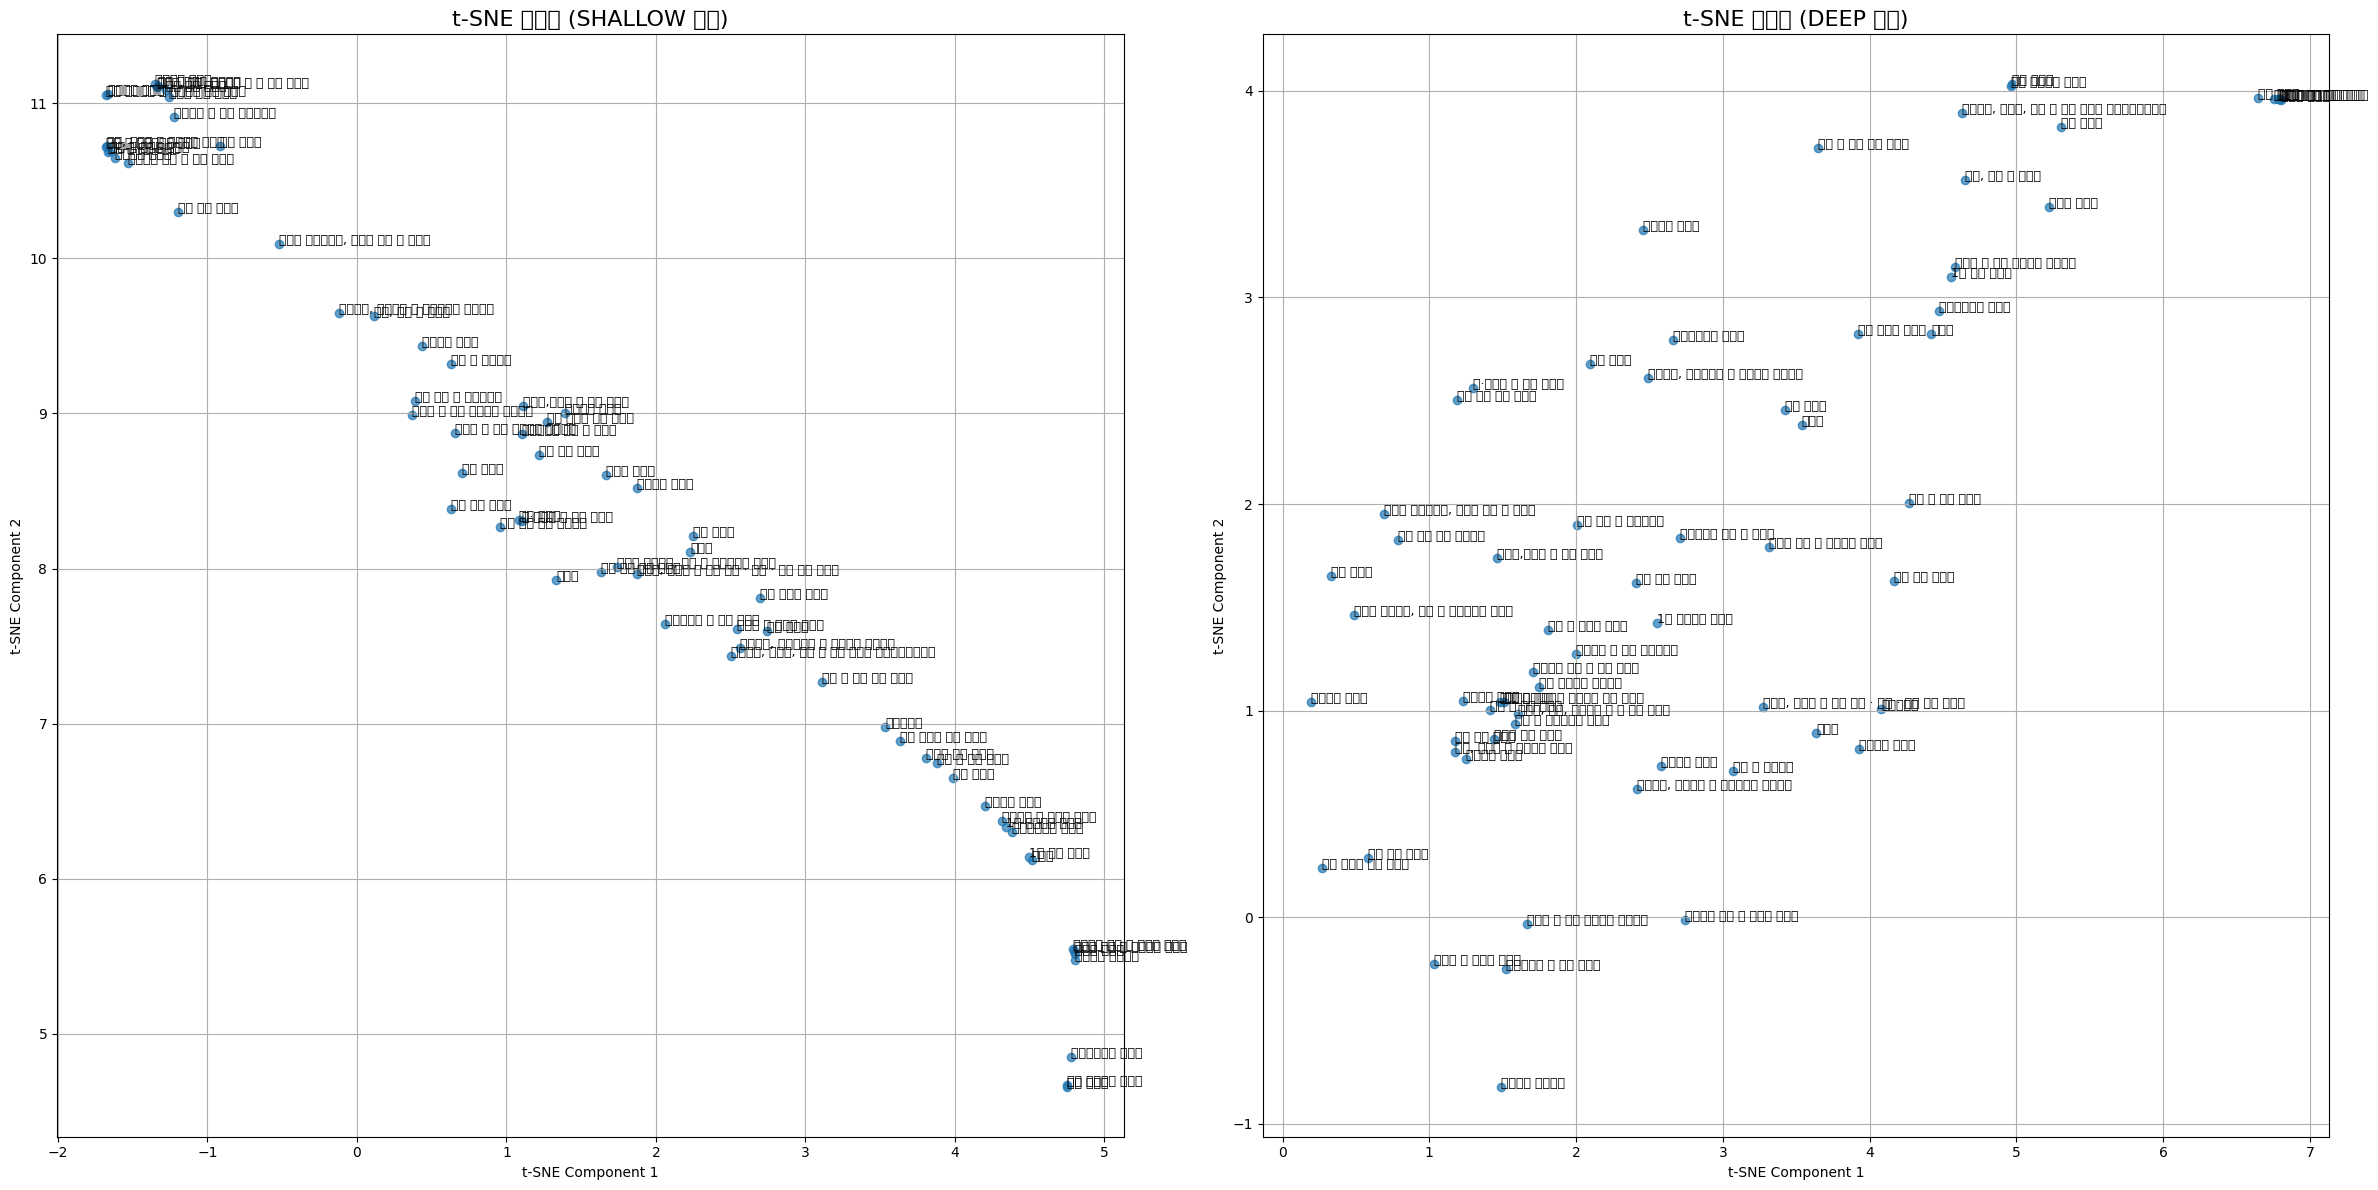

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

# 5-3. t-SNE 계산 및 시각화 루프
# enumerate를 사용하여 0번째, 1번째 subplot을 순차적으로 선택
for i, (model_type, embedding_df) in enumerate(final_embeddings.items()):
    
  ax = axes[i] # 현재 그릴 subplot (axes[0] 또는 axes[1])
  title = f"t-SNE 시각화 ({model_type.upper()} 모델)"
  
  # --- (기존 visualize_embeddings_with_tsne 함수의 핵심 로직) ---
  
  # 데이터 준비
  unique_embeddings = embedding_df.loc[series.drop_duplicates().index]
  unique_labels = series.drop_duplicates().values
  
  # t-SNE 계산 (데이터 크기에 따라 시간이 걸릴 수 있음)
  print(f"--- {model_type.upper()} t-SNE 계산 시작... ---")
  tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(unique_labels)-1))
  tsne_results = tsne.fit_transform(unique_embeddings)
  print(f"--- {model_type.upper()} t-SNE 계산 완료 ---")

  # Subplot에 시각화
  ax.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
  for j, label in enumerate(unique_labels):
      ax.annotate(label, (tsne_results[j, 0], tsne_results[j, 1]), fontsize=9)
  
  ax.set_title(title, fontsize=16)
  ax.set_xlabel("t-SNE Component 1")
  ax.set_ylabel("t-SNE Component 2")
  ax.grid(True)
  # --- (로직 끝) ---

# 5-4. 전체 Figure 표시
plt.tight_layout() # 그래프들이 겹치지 않게 자동 조정
plt.show()


--- [1/4] Deep 모델 임베딩 로딩 ---
✅ 완료

--- [2/4] 계층적 군집화 덴드로그램 생성 ---
덴드로그램을 보고 비즈니스적으로 의미 있는 k값을 결정하세요.


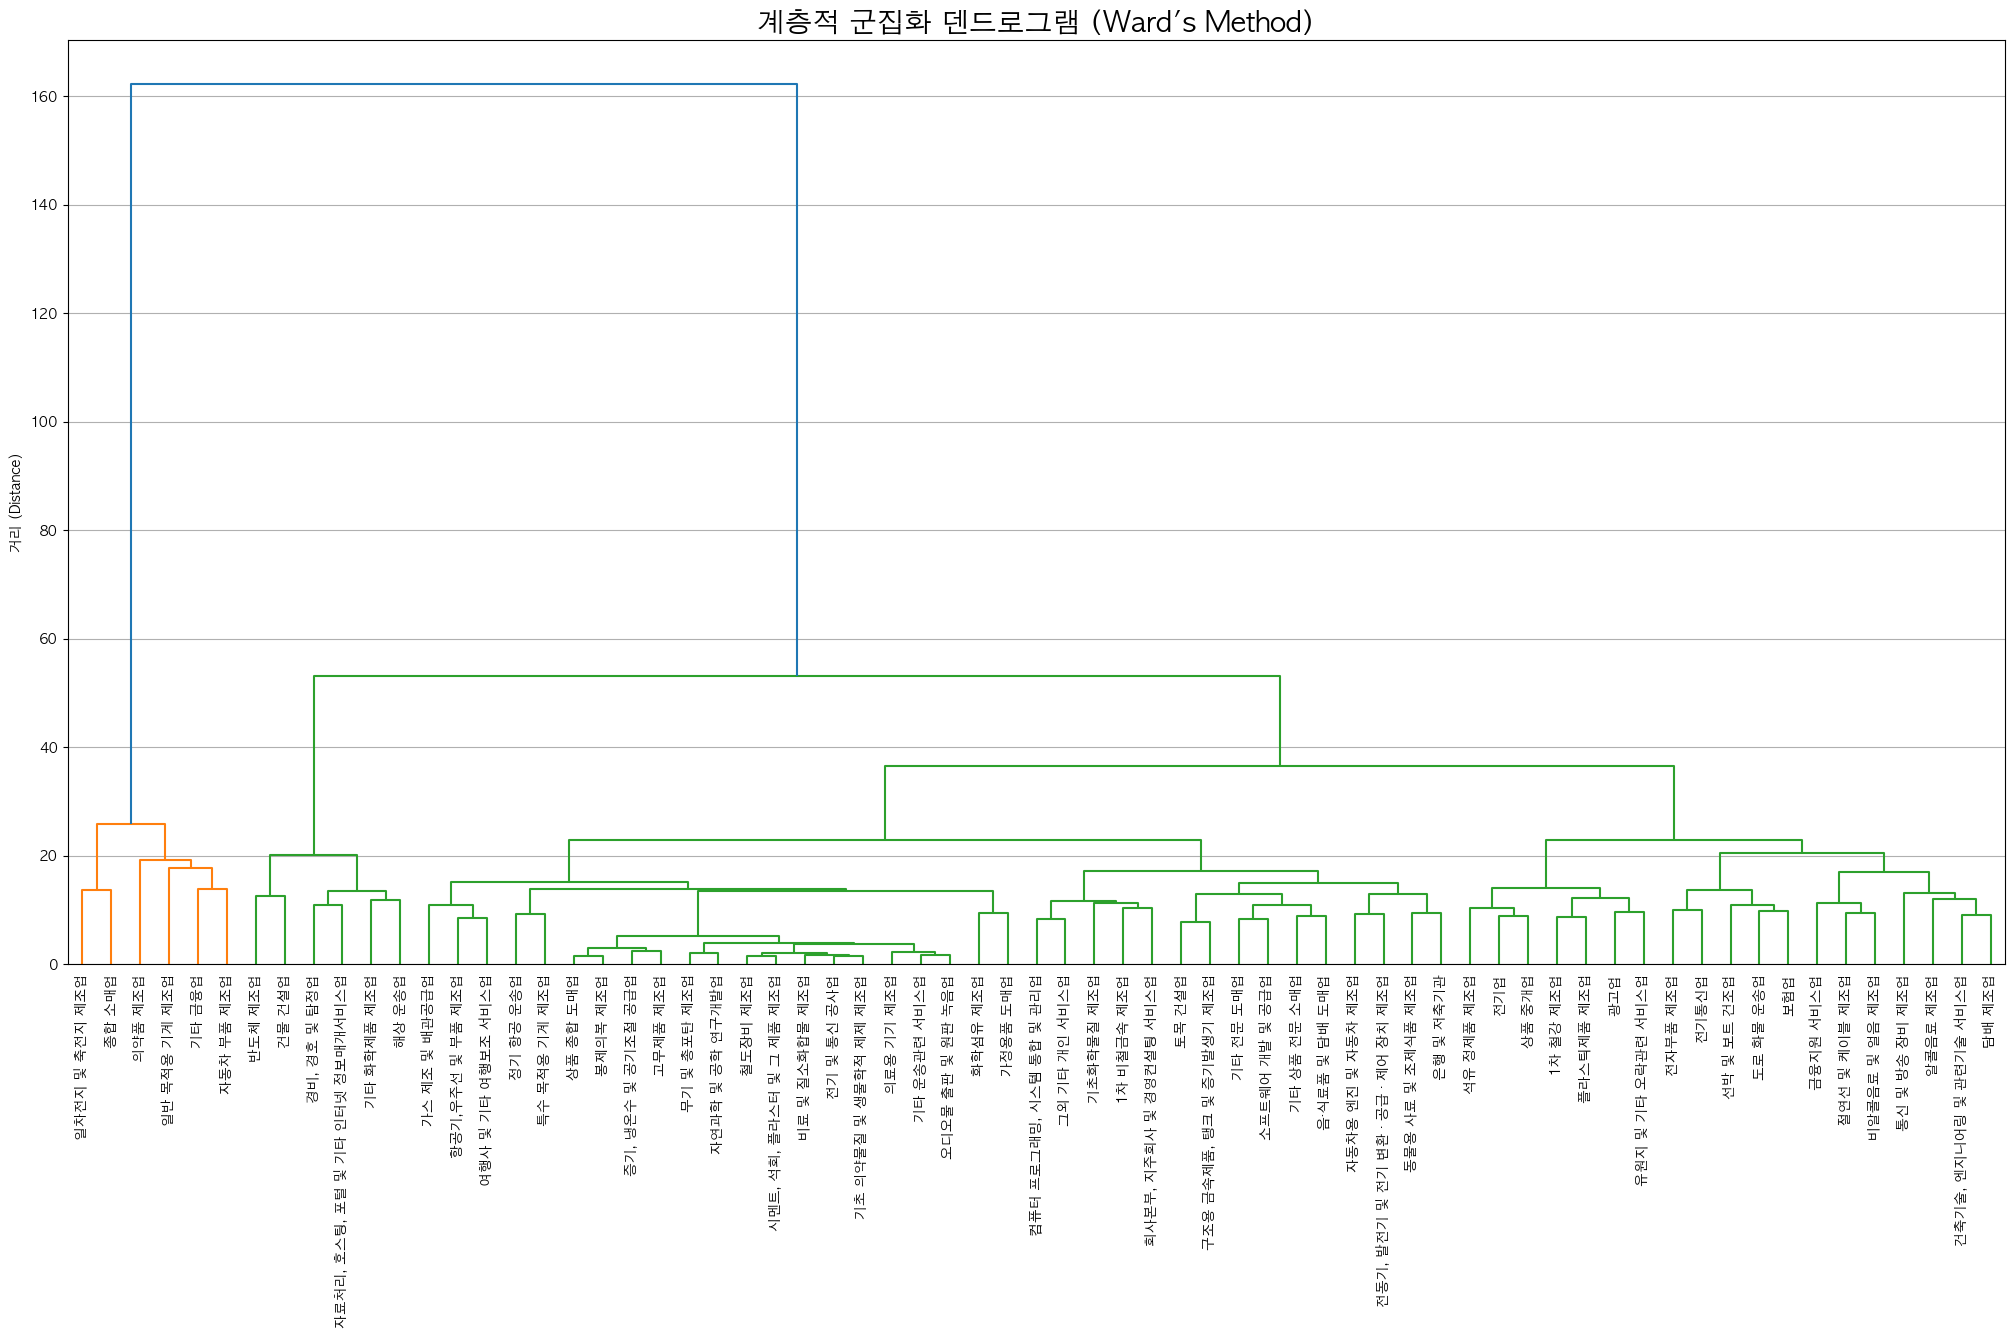


--- [3/4] 덴드로그램 기반 최종 클러스터링 수행 ---
✅ 분석가가 선택한 클러스터 개수(k): 8
✅ 완료

--- Cluster 1 Members ---
['일차전지 및 축전지 제조업' '종합 소매업']

--- Cluster 2 Members ---
['의약품 제조업' '기타 금융업' '자동차 부품 제조업' '일반 목적용 기계 제조업']

--- Cluster 3 Members ---
['반도체 제조업' '기타 화학제품 제조업' '건물 건설업' '해상 운송업' '경비, 경호 및 탐정업'
 '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개서비스업']

--- Cluster 4 Members ---
['화학섬유 제조업' '정기 항공 운송업' '가정용품 도매업' '항공기,우주선 및 부품 제조업' '가스 제조 및 배관공급업'
 '여행사 및 기타 여행보조 서비스업' '특수 목적용 기계 제조업' '전기 및 통신 공사업' '철도장비 제조업'
 '기초 의약물질 및 생물학적 제제 제조업' '증기, 냉온수 및 공기조절 공급업' '고무제품 제조업' '무기 및 총포탄 제조업'
 '기타 운송관련 서비스업' '상품 종합 도매업' '의료용 기기 제조업' '비료 및 질소화합물 제조업'
 '시멘트, 석회, 플라스터 및 그 제품 제조업' '자연과학 및 공학 연구개발업' '오디오물 출판 및 원판 녹음업'
 '봉제의복 제조업']

--- Cluster 5 Members ---
['기초화학물질 제조업' '자동차용 엔진 및 자동차 제조업' '1차 비철금속 제조업' '토목 건설업'
 '동물용 사료 및 조제식품 제조업' '회사본부, 지주회사 및 경영컨설팅 서비스업' '기타 상품 전문 소매업'
 '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업' '구조용 금속제품, 탱크 및 증기발생기 제조업'
 '컴퓨터 프로그래밍, 시스템 통합 및 관리업' '그외 기타 개인 서비스업' '은행 및 저축기관' '음·식료품 및 담배 도매업'
 '기타 전문 도매업' '소프트웨어 개발 및 공급업']


In [26]:
# ==============================================================================
# 6. 계층적 군집화(HC) 및 최종 시각화
# ==============================================================================
import scipy.cluster.hierarchy as sch  # 계층적 군집화 라이브러리 임포트
import matplotlib.cm as cm
# from sklearn.cluster import KMeans # K-Means는 더 이상 필요 없음
# from sklearn.metrics import silhouette_score # 실루엣 스코어는 더 이상 필요 없음
# from tqdm import tqdm # tqdm은 더 이상 필요 없음

# 6-1. Deep 모델의 임베딩 결과 선택
print("\n--- [1/4] Deep 모델 임베딩 로딩 ---")
deep_embedding_df = final_embeddings['deep']
print("✅ 완료")

# 6-2. 계층적 군집화 덴드로그램 시각화
print("\n--- [2/4] 계층적 군집화 덴드로그램 생성 ---")
print("덴드로그램을 보고 비즈니스적으로 의미 있는 k값을 결정하세요.")

# K-Means와 달리, HC와 t-SNE는 '고유한' 산업 리스트에 대해서만 수행하면 됩니다.
# 1. 고유한 산업(업종) 리스트와 해당 임베딩 추출
unique_df = series.to_frame(name='std_idst_clsf_cd_name').drop_duplicates(subset='std_idst_clsf_cd_name')
unique_embeddings = deep_embedding_df.loc[unique_df.index]
unique_labels = unique_df['std_idst_clsf_cd_name'].values

# 2. 계층적 군집화 수행 (Ward's Method 사용)
# 'ward' 방식은 군집 내 분산을 최소화하여 K-Means와 유사한 결과를 냅니다.
linked = sch.linkage(unique_embeddings, method='ward')

# 3. 폰트 설정
os_name = platform.system()
if os_name == 'Windows': font_name = 'Malgun Gothic'
elif os_name == 'Darwin': font_name = 'AppleGothic'
else: font_name = 'NanumGothic'
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 4. 덴드로그램 시각화
plt.figure(figsize=(25, 12))
sch.dendrogram(linked,
               labels=unique_labels,
               leaf_rotation=90.,  # 라벨 90도 회전
               leaf_font_size=10.) # 라벨 폰트 크기
plt.title('계층적 군집화 덴드로그램 (Ward\'s Method)', fontsize=20)
plt.ylabel('거리 (Distance)')
plt.grid(axis='y')
plt.show()


# 6-3. 덴드로그램 기반 최종 클러스터링 수행
print("\n--- [3/4] 덴드로그램 기반 최종 클러스터링 수행 ---")
# ----------------------------------------------------------------------
# !!! 중요 !!!
# 위 덴드로그램을 보고, 관리 가능한 수준의 클러스터 개수(k)를 직접 결정합니다.
# 예를 들어, 8~10개 정도의 섹터가 적절하다고 판단되면 그 값을 입력합니다.
CHOSEN_K = 8  # <-- 분석가가 덴드로그램을 보고 직접 설정하는 값 (예: 8)
# ----------------------------------------------------------------------
print(f"✅ 분석가가 선택한 클러스터 개수(k): {CHOSEN_K}")

# fcluster를 사용해 덴드로그램을 k개로 자르고, 각 고유 산업에 클러스터 라벨 할당
unique_cluster_labels = sch.fcluster(linked, CHOSEN_K, criterion='maxclust')

# 원본 데이터에 클러스터 레이블을 매핑
# 1. (산업명 -> 클러스터 라벨) 딕셔너리 생성
label_map = dict(zip(unique_labels, unique_cluster_labels))
# 2. 원본 series에 맵 적용
final_cluster_labels = series.map(label_map)

series_with_clusters = series.to_frame(name='std_idst_clsf_cd_name')
series_with_clusters['cluster'] = final_cluster_labels
print("✅ 완료")


# 6-4. 클러스터링 결과를 반영한 새로운 시각화 함수 정의
# (K-Means 코드와 거의 동일하나, legend 부분만 수정)
def visualize_clustered_embeddings(original_series_with_clusters: pd.DataFrame, 
                                   embedding_df: pd.DataFrame, 
                                   title: str,
                                   n_clusters: int): # 클러스터 개수를 인자로 받음
  os_name = platform.system()
  if os_name == 'Windows': font_name = 'Malgun Gothic'
  elif os_name == 'Darwin': font_name = 'AppleGothic'
  else: font_name = 'NanumGothic'
  plt.rcParams['font.family'] = font_name
  plt.rcParams['axes.unicode_minus'] = False

  # 고유값에 대한 임베딩과 클러스터 레이블 추출
  unique_df = original_series_with_clusters.drop_duplicates(subset='std_idst_clsf_cd_name')
  unique_embeddings = embedding_df.loc[unique_df.index]
  unique_labels = unique_df['std_idst_clsf_cd_name'].values
  unique_clusters = unique_df['cluster'].values
  
  print("\n--- [4/4] t-SNE 변환 및 시각화 생성 ---")
  print("t-SNE 변환은 데이터 크기에 따라 수 분이 소요될 수 있습니다...")
  tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(unique_labels)-1))
  tsne_results = tsne.fit_transform(unique_embeddings)
  print("✅ t-SNE 변환 완료. 그래프를 출력합니다.")
  
  plt.figure(figsize=(20, 16))
  
  # HC의 클러스터 라벨은 1부터 시작합니다.
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=unique_clusters, 
                        cmap=cm.get_cmap('viridis', n_clusters), alpha=0.8)
  
  # 범례(Legend) 추가 (HC 라벨은 1부터 k까지)
  plt.legend(handles=scatter.legend_elements(num=n_clusters)[0], 
             labels=range(1, n_clusters + 1), 
             title="Clusters")

  for i, label in enumerate(unique_labels):
    plt.annotate(label, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)
    
  plt.title(title, fontsize=20)
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
  plt.grid(True)
  plt.show()

# 6-5. 최종 시각화 실행
for i in range(1, CHOSEN_K + 1):
  print(f"\n--- Cluster {i} Members ---")
  cluster_members = series_with_clusters[series_with_clusters['cluster'] == i]['std_idst_clsf_cd_name'].unique()
  print(cluster_members)


--- [1/4] Deep 모델 임베딩 로딩 ---
✅ 완료

--- [2/4] 최적 클러스터 개수(k) 탐색 (실루엣 스코어) ---
데이터가 많으므로 5000개만 샘플링하여 실루엣 스코어를 계산합니다.


K-Means 클러스터링 진행 중: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


k = 3, 실루엣 스코어: 0.4572
k = 4, 실루엣 스코어: 0.3637
k = 5, 실루엣 스코어: 0.3282
k = 6, 실루엣 스코어: 0.3922
k = 7, 실루엣 스코어: 0.3969
k = 8, 실루엣 스코어: 0.3889
k = 9, 실루엣 스코어: 0.4397
k = 10, 실루엣 스코어: 0.4377
k = 11, 실루엣 스코어: 0.4503
k = 12, 실루엣 스코어: 0.4682
k = 13, 실루엣 스코어: 0.5080
k = 14, 실루엣 스코어: 0.5355
k = 15, 실루엣 스코어: 0.5598

✅ 완료. 최적의 클러스터 개수(k): 15

--- [3/4] 최종 클러스터링 수행 (k=15) ---
✅ 완료

--- [4/4] t-SNE 변환 및 시각화 생성 ---
t-SNE 변환은 데이터 크기에 따라 수 분이 소요될 수 있습니다...
✅ t-SNE 변환 완료. 그래프를 출력합니다.


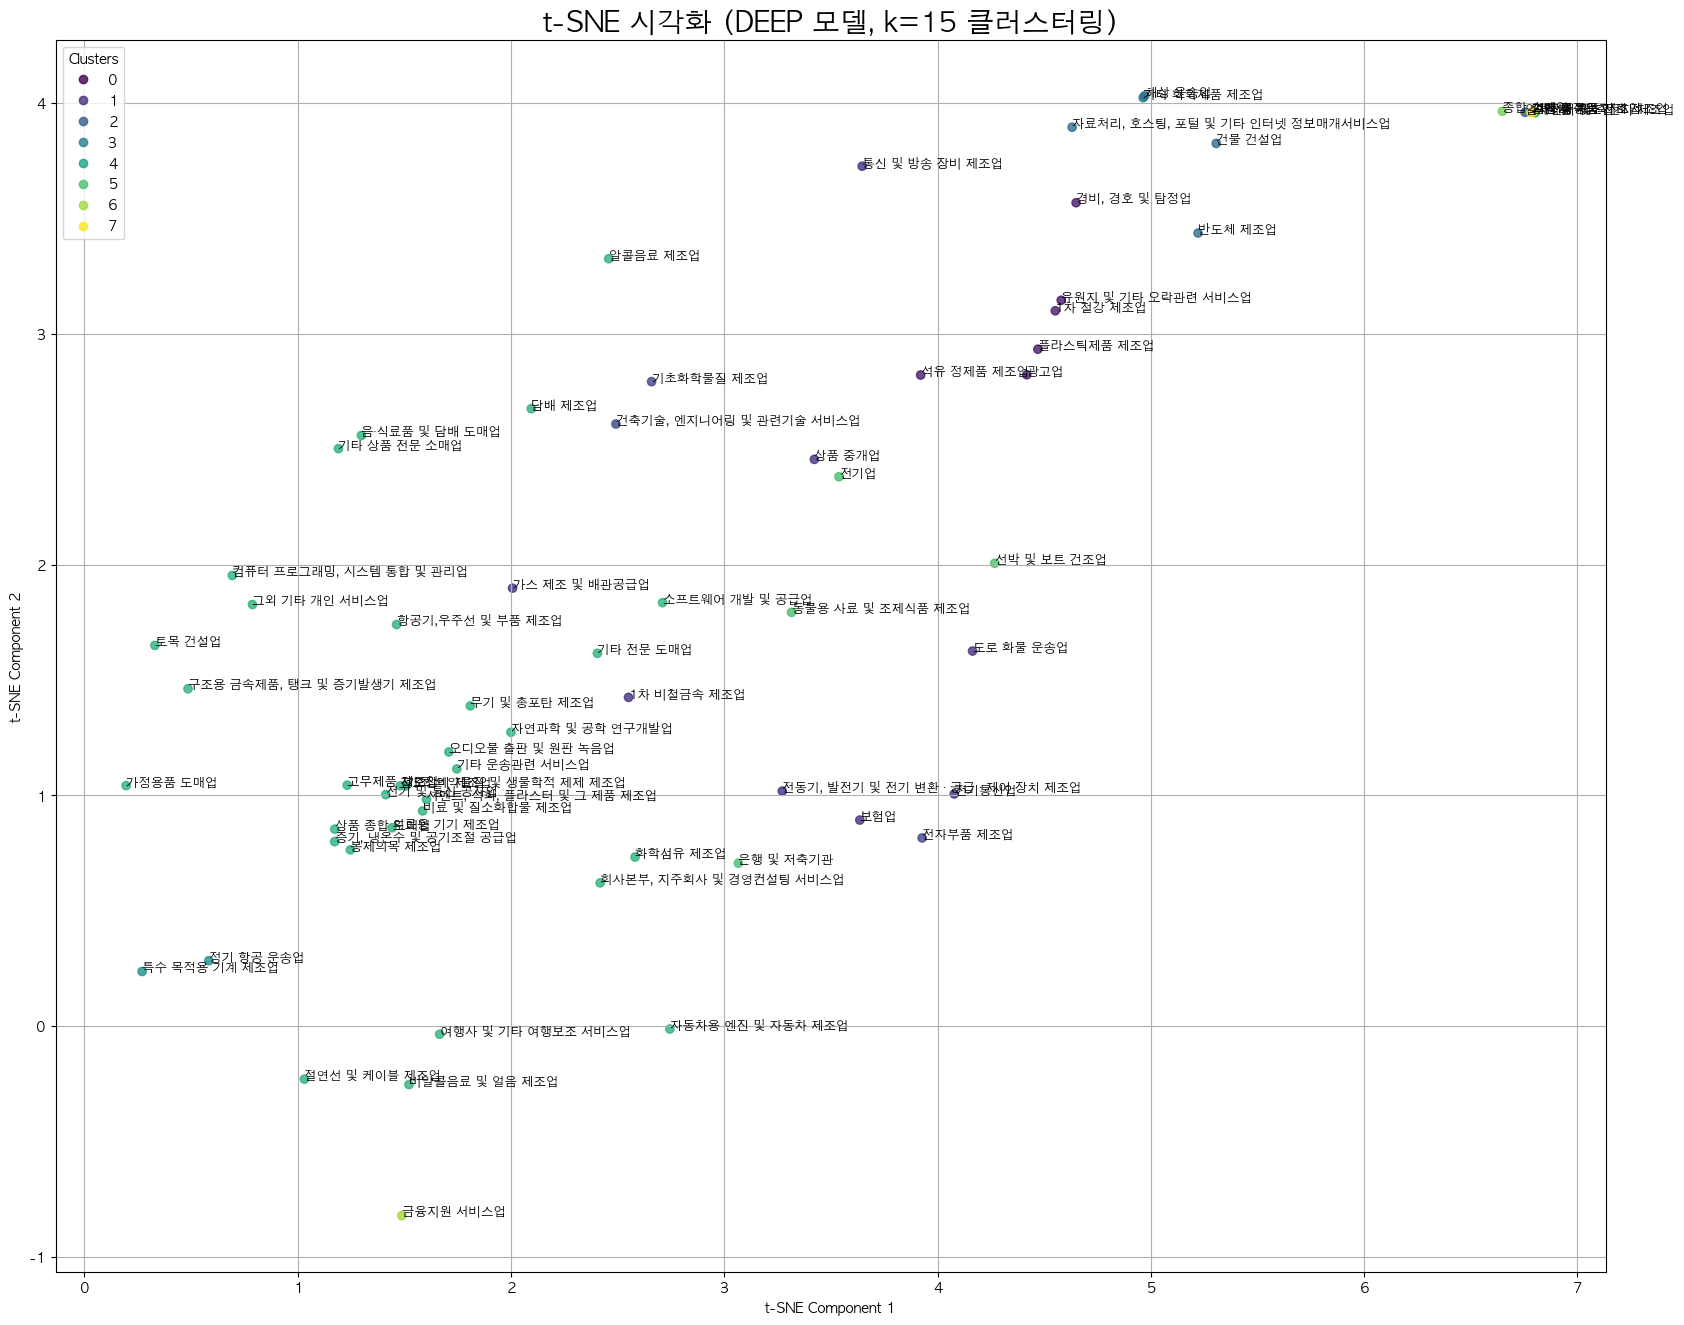

In [19]:
# ==============================================================================
# 6. K-Means 클러스터링 및 최종 시각화 (진행 상황 표시 추가)
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from tqdm import tqdm # tqdm 라이브러리 임포트

# 6-1. Deep 모델의 임베딩 결과 선택
print("\n--- [1/4] Deep 모델 임베딩 로딩 ---")
deep_embedding_df = final_embeddings['deep']
print("✅ 완료")

# 6-2. 최적의 클러스터 개수(k) 찾기 (실루엣 스코어 사용)
print("\n--- [2/4] 최적 클러스터 개수(k) 탐색 (실루엣 스코어) ---")

# 샘플링 추가: 5000개 데이터만 무작위로 추출하여 사용
if len(deep_embedding_df) > 5000:
  print("데이터가 많으므로 5000개만 샘플링하여 실루엣 스코어를 계산합니다.")
  sample_df = deep_embedding_df.sample(n=10000, random_state=42)
else:
  sample_df = deep_embedding_df

k_range = range(3, 16)
silhouette_scores = []

for k in tqdm(k_range, desc="K-Means 클러스터링 진행 중"):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
  
  # 전체 데이터로 클러스터링은 하되,
  cluster_labels = kmeans.fit_predict(deep_embedding_df)
  
  # 스코어 계산은 샘플링된 데이터로 수행하여 속도 향상
  score = silhouette_score(sample_df, kmeans.predict(sample_df))
  silhouette_scores.append(score)

# 진행 상황 확인을 위해 루프 밖으로 print문 이동
for i, k in enumerate(k_range):
  print(f"k = {k}, 실루엣 스코어: {silhouette_scores[i]:.4f}")
    
# 가장 높은 실루엣 스코어를 가진 k를 최적의 k로 선택
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\n✅ 완료. 최적의 클러스터 개수(k): {optimal_k}")


# 6-3. 최적의 k로 최종 클러스터링 수행
print(f"\n--- [3/4] 최종 클러스터링 수행 (k={optimal_k}) ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
final_cluster_labels = kmeans.fit_predict(deep_embedding_df)

# 원본 데이터에 클러스터 레이블 추가
series_with_clusters = series.to_frame(name='std_idst_clsf_cd_name')
series_with_clusters['cluster'] = final_cluster_labels
print("✅ 완료")


# 6-4. 클러스터링 결과를 반영한 새로운 시각화 함수 정의
def visualize_clustered_embeddings(original_series_with_clusters: pd.DataFrame, 
                                   embedding_df: pd.DataFrame, 
                                   title: str):
  os_name = platform.system()
  if os_name == 'Windows': font_name = 'Malgun Gothic'
  elif os_name == 'Darwin': font_name = 'AppleGothic'
  else: font_name = 'NanumGothic'
  plt.rcParams['font.family'] = font_name
  plt.rcParams['axes.unicode_minus'] = False

  # 고유값에 대한 임베딩과 클러스터 레이블 추출
  unique_df = original_series_with_clusters.drop_duplicates(subset='std_idst_clsf_cd_name')
  unique_embeddings = embedding_df.loc[unique_df.index]
  unique_labels = unique_df['std_idst_clsf_cd_name'].values
  unique_clusters = unique_df['cluster'].values
  
  print("\n--- [4/4] t-SNE 변환 및 시각화 생성 ---")
  print("t-SNE 변환은 데이터 크기에 따라 수 분이 소요될 수 있습니다...")
  tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(unique_labels)-1))
  tsne_results = tsne.fit_transform(unique_embeddings)
  print("✅ t-SNE 변환 완료. 그래프를 출력합니다.")
  
  plt.figure(figsize=(20, 16))
  
  scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=unique_clusters, cmap='viridis', alpha=0.8)
  
  plt.legend(handles=scatter.legend_elements()[0], labels=range(optimal_k), title="Clusters")

  # tqdm을 주석 처리된 annotate 루프에 적용하여 진행 상황 확인 가능
  # for i in tqdm(range(len(unique_labels)), desc="라벨링 중"):
  for i, label in enumerate(unique_labels):
    plt.annotate(label, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)
    
  plt.title(title, fontsize=20)
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
  plt.grid(True)
  plt.show()

# 6-5. 최종 시각화 실행
clustered_viz_title = f"t-SNE 시각화 (DEEP 모델, k={optimal_k} 클러스터링)"
visualize_clustered_embeddings(series_with_clusters, deep_embedding_df, clustered_viz_title)

In [20]:
# 최종적으로 학습된 최적의 모델들
# best_models['shallow']
best_models['deep']

<Functional name=functional, built=True>

In [21]:
# 위에서 사용한 동일한 sample_series를 사용
# 67개의 산업을 10차원 벡터로 임베딩
embedding_features = get_autoencoder_embedding(df['std_idst_clsf_cd_name'], embedding_dim=10)

Autoencoder 학습을 시작합니다...
학습 완료.
37776/37776 ━━━━━━━━━━━━━━━━━━━━ 9s 241us/step
'std_idst_clsf_cd_name' 피처를 10차원 임베딩 벡터로 변환했습니다.


In [22]:
embedding_features

,std_idst_clsf_cd_name_embed_0,std_idst_clsf_cd_name_embed_1,std_idst_clsf_cd_name_embed_2,std_idst_clsf_cd_name_embed_3,std_idst_clsf_cd_name_embed_4,std_idst_clsf_cd_name_embed_5,std_idst_clsf_cd_name_embed_6,std_idst_clsf_cd_name_embed_7,std_idst_clsf_cd_name_embed_8,std_idst_clsf_cd_name_embed_9
0,0.00000,0.000000,4.199037,4.856331,7.224814,7.556914,0.00000,0.000000,3.620361,0.0
1,0.00000,0.000000,4.199037,4.856331,7.224814,7.556914,0.00000,0.000000,3.620361,0.0
2,0.00000,0.000000,4.199037,4.856331,7.224814,7.556914,0.00000,0.000000,3.620361,0.0
3,0.00000,0.000000,4.199037,4.856331,7.224814,7.556914,0.00000,0.000000,3.620361,0.0
4,0.00000,0.000000,4.199037,4.856331,7.224814,7.556914,0.00000,0.000000,3.620361,0.0
...,...,...,...,...,...,...,...,...,...,...
1208820,4.18764,22.221426,8.110244,7.938070,11.138445,3.278032,4.32808,2.197511,9.628083,0.0
1208821,4.18764,22.221426,8.110244,7.938070,11.138445,3.278032,4.32808,2.197511,9.628083,0.0
1208822,4.18764,22.221426,8.110244,7.938070,11.138445,3.278032,4.32808,2.197511,9.628083,0.0
1208823,4.18764,22.221426,8.110244,7.938070,11.138445,3.278032,4.32808,2.197511,9.628083,0.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings_with_tsne(original_series: pd.Series, embedding_df: pd.DataFrame):
  """
  t-SNE를 사용하여 고차원 임베딩을 2차원으로 시각화합니다.
  
  Args:
    original_series (pd.Series): 원본 카테고리 데이터
    embedding_df (pd.DataFrame): Autoencoder로 생성된 임베딩 데이터프레임
  """
  # 고유 카테고리와 해당 임베딩만 추출 (중복 제거)
  unique_embeddings = embedding_df.loc[original_series.drop_duplicates().index]
  unique_labels = original_series.drop_duplicates().values

  # t-SNE 모델 생성 및 학습
  tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(unique_labels)-1))
  tsne_results = tsne.fit_transform(unique_embeddings)
  
  # 시각화
  plt.rcParams['font.family'] = 'AppleGothic'
  plt.rcParams['axes.unicode_minus'] = False

  plt.figure(figsize=(12, 8))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)
  
  # 각 점에 라벨(카테고리 이름) 표시
  for i, label in enumerate(unique_labels):
    plt.annotate(label, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)
      
  plt.title("t-SNE 시각화를 통한 산업군 임베딩 공간 분석", fontsize=16)
  plt.xlabel("t-SNE Component 1")
  plt.ylabel("t-SNE Component 2")
  plt.grid(True)
  plt.show()

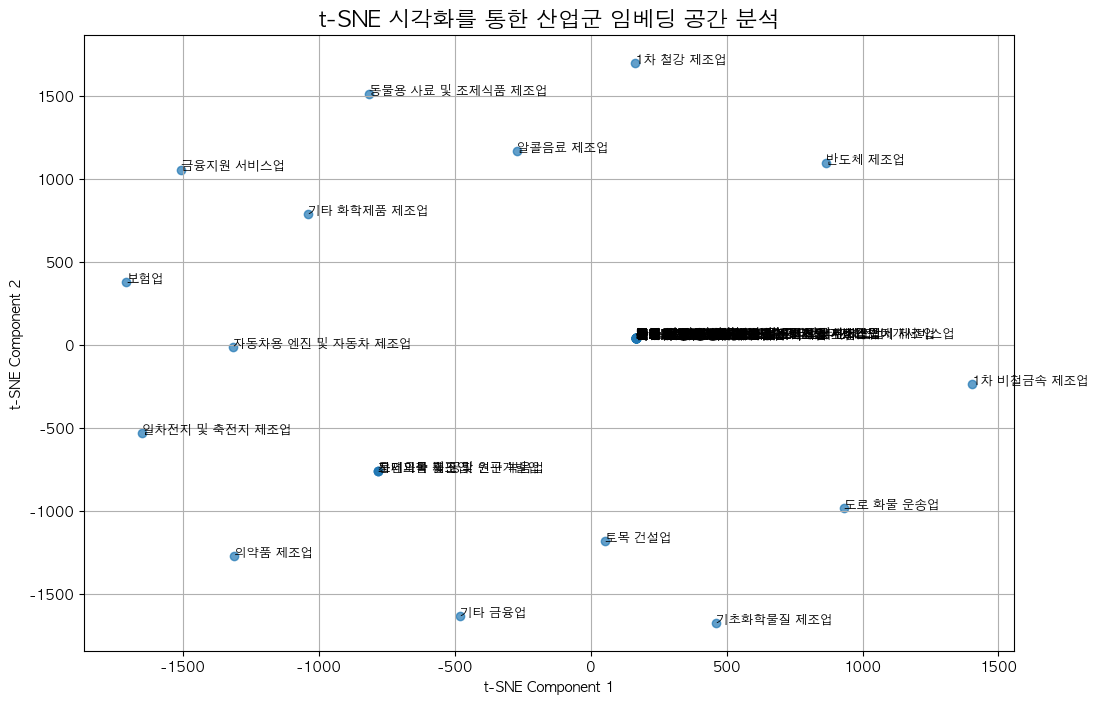

In [24]:
original_series = df['std_idst_clsf_cd_name']
visualize_embeddings_with_tsne(original_series, encoded_features)

In [25]:
visualize_embeddings_with_tsne(original_series, best_models['deep'])

AttributeError: 'Functional' object has no attribute 'loc'